# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists
city_name = []
lat = []
lon = []
high = []
humid = []
cloud = []
wind = []
country = []
time = []

cty_ct = 1

url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'
print("Beggining Data Retrieval")
print("------------------------")
for place in cities:
    try:        
        response = requests.get(f"{url}&q={place}&APPID={weather_api_key}").json() 
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        high.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        time.append(response['dt'])
        print(f"Processing Record {cty_ct} of set 1 | {place}")
        cty_ct = cty_ct + 1
    except:
        print(f"City not found! Skipping...")      

Beggining Data Retrieval
------------------------
Processing Record 1 of set 1 | hilo
Processing Record 2 of set 1 | goderich
Processing Record 3 of set 1 | ribeira grande
Processing Record 4 of set 1 | new richmond
City not found! Skipping...
Processing Record 5 of set 1 | puerto ayora
Processing Record 6 of set 1 | ayan
Processing Record 7 of set 1 | newport
Processing Record 8 of set 1 | kapaa
Processing Record 9 of set 1 | arraial do cabo
Processing Record 10 of set 1 | bluff
Processing Record 11 of set 1 | jamestown
Processing Record 12 of set 1 | ucluelet
Processing Record 13 of set 1 | zyryanka
Processing Record 14 of set 1 | zharkent
Processing Record 15 of set 1 | barrow
Processing Record 16 of set 1 | chicama
Processing Record 17 of set 1 | bethel
Processing Record 18 of set 1 | ushuaia
Processing Record 19 of set 1 | atuona
Processing Record 20 of set 1 | moyale
Processing Record 21 of set 1 | grindavik
Processing Record 22 of set 1 | nikolskoye
Processing Record 23 of set 1

Processing Record 184 of set 1 | hurghada
Processing Record 185 of set 1 | benghazi
Processing Record 186 of set 1 | necochea
Processing Record 187 of set 1 | imbituba
Processing Record 188 of set 1 | magdagachi
Processing Record 189 of set 1 | cidreira
Processing Record 190 of set 1 | matara
Processing Record 191 of set 1 | chapais
Processing Record 192 of set 1 | nalut
Processing Record 193 of set 1 | waterbury
Processing Record 194 of set 1 | palamos
Processing Record 195 of set 1 | baykit
Processing Record 196 of set 1 | puerto rico
Processing Record 197 of set 1 | oliveira dos brejinhos
Processing Record 198 of set 1 | sangar
Processing Record 199 of set 1 | shiyan
Processing Record 200 of set 1 | kruisfontein
Processing Record 201 of set 1 | russell
City not found! Skipping...
Processing Record 202 of set 1 | tolbazy
Processing Record 203 of set 1 | najran
Processing Record 204 of set 1 | clyde river
City not found! Skipping...
Processing Record 205 of set 1 | aswan
Processing Re

Processing Record 371 of set 1 | aripuana
Processing Record 372 of set 1 | sundumbili
Processing Record 373 of set 1 | nyurba
Processing Record 374 of set 1 | christchurch
Processing Record 375 of set 1 | salvatierra
Processing Record 376 of set 1 | rapid city
Processing Record 377 of set 1 | juazeirinho
Processing Record 378 of set 1 | husavik
Processing Record 379 of set 1 | valle de allende
City not found! Skipping...
Processing Record 380 of set 1 | lompoc
Processing Record 381 of set 1 | novo aripuana
Processing Record 382 of set 1 | severo-kurilsk
City not found! Skipping...
Processing Record 383 of set 1 | hanmer springs
Processing Record 384 of set 1 | pyaozerskiy
City not found! Skipping...
Processing Record 385 of set 1 | narsaq
Processing Record 386 of set 1 | roma
Processing Record 387 of set 1 | niltepec
Processing Record 388 of set 1 | damietta
Processing Record 389 of set 1 | egvekinot
Processing Record 390 of set 1 | kahului
Processing Record 391 of set 1 | mamallapuram

Processing Record 552 of set 1 | ocos
Processing Record 553 of set 1 | sao filipe
Processing Record 554 of set 1 | rio gallegos
City not found! Skipping...
City not found! Skipping...
Processing Record 555 of set 1 | jiayuguan


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Lat":lat, 
    "Lng":lon,
    "Max Temp": high,
    "Humidity": humid,
    "Cloudiness":cloud,
    "Wind Speed":wind,     
    "Country":country,
    "Date":time}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_df.count()
        

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Save to CSV
weather_df.to_csv('Output_data/weather.csv')

# Display data 
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,75.99,83,90,13.80,US,1615761780
1,Goderich,43.7501,-81.7165,28.40,59,8,17.27,CA,1615761964
2,Ribeira Grande,38.5167,-28.7000,60.80,100,40,6.91,PT,1615761964
3,New Richmond,45.1230,-92.5366,42.80,28,1,10.36,US,1615761681
4,Puerto Ayora,-0.7393,-90.3518,82.40,74,40,9.22,EC,1615761965


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
for h in weather_df["Humidity"]:
    if h > 100:
        print("At least 1 city has humidity greater than 100%")
        break
    else:
        print("No cities have hunidity above 100%")
        break

No cities have hunidity above 100%


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

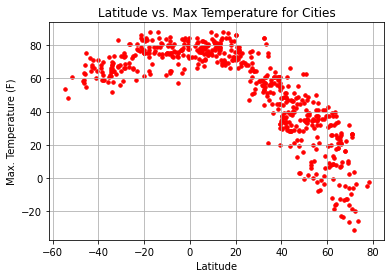

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=12, color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature for Cities")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

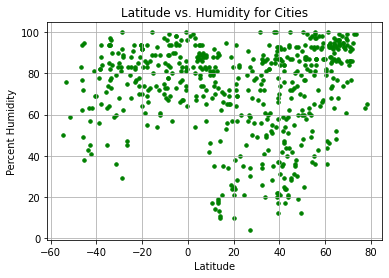

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=12, color='green')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity for Cities")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

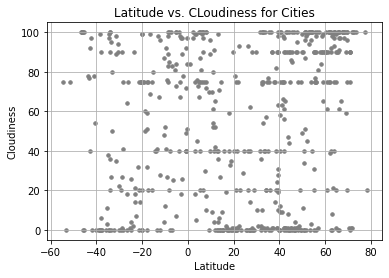

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=12, color='gray')

# Incorporate the other graph properties
plt.title("Latitude vs. CLoudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

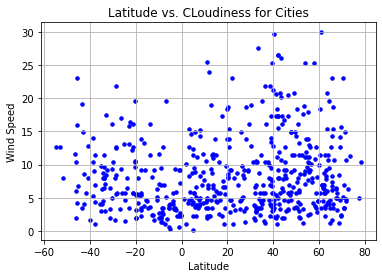

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=12, color='blue')

# Incorporate the other graph properties
plt.title("Latitude vs. CLoudiness for Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
#Seperate by north and southern 
north = weather_df.loc[weather_df["Lat"] >= 0.0]
#north.reset_index(inplace=True)

south = weather_df.loc[weather_df["Lat"] < 0.0]
#south.reset_index(inplace=True)
south

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Puerto Ayora,-0.7393,-90.3518,82.40,74,40,9.22,EC,1615761965
8,Arraial do Cabo,-22.9661,-42.0278,77.81,83,14,15.82,BR,1615761966
9,Bluff,-46.6000,168.3333,58.66,83,100,11.52,NZ,1615761966
15,Chicama,-7.8447,-79.1469,73.40,83,0,6.91,PE,1615761968
17,Ushuaia,-54.8000,-68.3000,53.60,50,75,12.66,AR,1615761969
...,...,...,...,...,...,...,...,...,...
539,Takapau,-40.0333,176.3500,71.01,69,0,1.66,NZ,1615762133
540,Waitati,-45.7500,170.5667,68.00,49,100,15.99,NZ,1615762133
546,Faanui,-16.4833,-151.7500,83.07,73,99,13.27,PF,1615762136
550,Lima,-12.0432,-77.0282,80.60,61,0,9.22,PE,1615762014


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'images/regression.png'

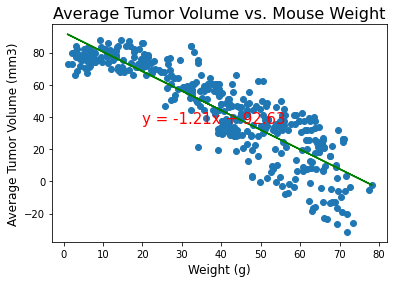

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Max Temp"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Max Temp"])
plt.plot(north["Lat"],reg,"g-")
plt.annotate(line,(20,36),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight",fontsize = 16)
plt.xlabel("Weight (g)",fontsize = 12)
plt.ylabel("Average Tumor Volume (mm3)",fontsize = 12)
plt.savefig("/regression.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression